In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
from astropy.io import fits
from astroquery.ipac.ned import Ned
ned = Ned()

In [3]:
from inspect import getfullargspec

In [4]:
getfullargspec(ned.get_images)

FullArgSpec(args=['self', 'object_name'], varargs=None, varkw=None, defaults=None, kwonlyargs=['get_query_payload', 'show_progress'], kwonlydefaults={'get_query_payload': False, 'show_progress': True}, annotations={})

In [5]:
image = ned.get_images("MCG -01-35-002")

In [6]:
image = image[0][0]

In [7]:
image

In [8]:
plt.style.use(astropy_mpl_style)

In [27]:
image_data: np.ndarray = image.data

In [10]:
image_data.shape

(141, 141)

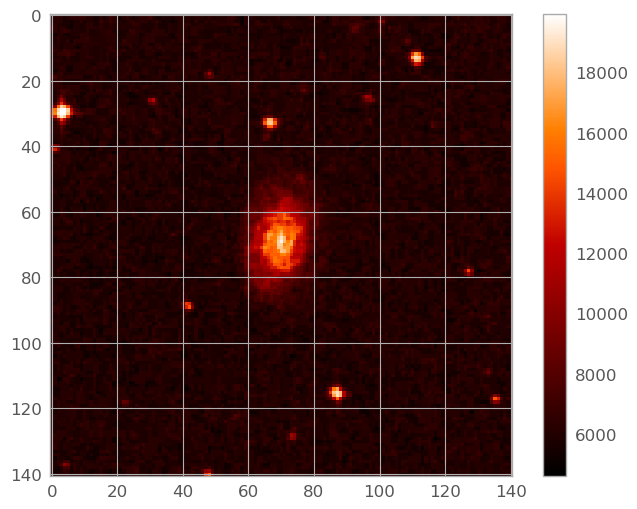

In [11]:
plt.imshow(image_data)
plt.colorbar()

In [12]:
type(image_data)

numpy.ndarray

In [13]:
def get_image_data(object_name: str, ned: Ned) -> np.ndarray:
    return ned.get_images(object_name)[0][0].data

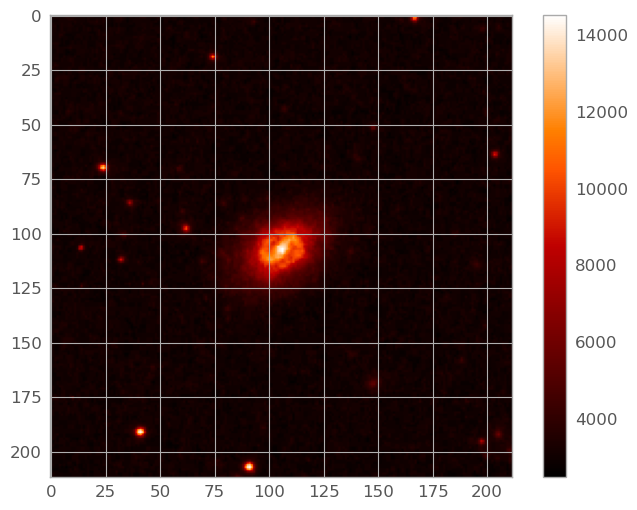

In [14]:
plt.imshow(get_image_data("NGC 5240", ned))
plt.colorbar()

In [15]:
print("\n".join([*ned.get_table("NGC 5240").columns]))

No.
Observed Passband
Photometry Measurement
Uncertainty
Units
Frequency
Flux Density
Upper limit of uncertainty
Lower limit of uncertainty
Upper limit of Flux Density
Lower limit of Flux Density
NED Uncertainty
NED Units
Refcode
Significance
Published frequency
Frequency Mode
Coordinates Targeted
Spatial Mode
Qualifiers
Comments


In [16]:
from astroquery.ipac.ned import Conf
conf = Conf()

In [17]:
[*conf.keys()]

['server',
 'timeout',
 'hubble_constant',
 'correct_redshift',
 'output_coordinate_frame',
 'output_equinox',
 'sort_output_by']

In [18]:
[*conf.values()]

[<ConfigItem: name='server' value='https://ned.ipac.caltech.edu/cgi-bin/' at 0x7f4ff88454d0>,
 <ConfigItem: name='timeout' value=60 at 0x7f4ff88456d0>,
 <ConfigItem: name='hubble_constant' value='73' at 0x7f4ff8845790>,
 <ConfigItem: name='correct_redshift' value='1' at 0x7f4ff8845810>,
 <ConfigItem: name='output_coordinate_frame' value='Equatorial' at 0x7f4ff8845a50>,
 <ConfigItem: name='output_equinox' value='J2000.0' at 0x7f4ff8845e10>,
 <ConfigItem: name='sort_output_by' value='RA or Longitude' at 0x7f4ff8846010>]

In [19]:
ned.query_object("m31")

No.,Object Name,RA,DEC,Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,Separation,References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations
,,degrees,degrees,,km / s,,,,arcmin,,,,,,,
int32,str30,float64,float64,object,float64,float64,object,object,float64,int32,int32,int32,int32,int32,int32,int32
1,MESSIER 031,10.68479,41.26906,G,-297.0,-0.000991,SUN,4.36,--,5163,23,176,63,40,13,2


In [20]:
spectra = ned.get_spectra("m31")

In [21]:
name = "MCG -06-09-008"
ned.get_image_list(name)

['https://ned.ipac.caltech.edu/dss1B2/Bb/MCG_-06-09-008:I:IIIaJ:dss1.fits.gz',
 'https://ned.ipac.caltech.edu/img/2007ApJS..173..185G/PGC_13343:I:NUV:g2006.fits.gz',
 'https://ned.ipac.caltech.edu/img/2007ApJS..173..185G/PGC_13343:I:FUV:g2006.fits.gz']

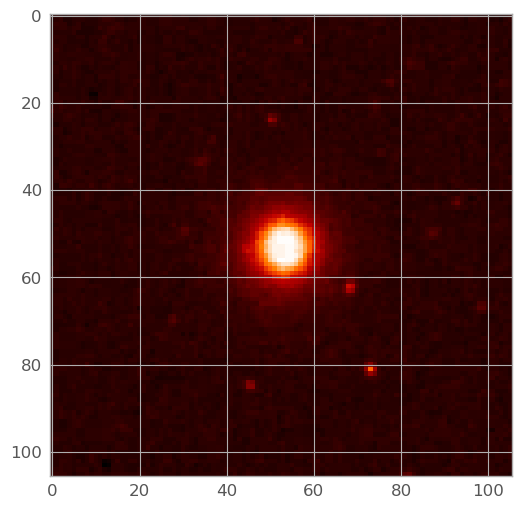

In [22]:
plt.imshow(ned.get_images(name)[0][0].data)

In [23]:
# from astropy.io.fits.
from astropy.io.fits.hdu.image import PrimaryHDU

name = "M32"
print('\n'.join(ned.get_image_list(name)))

https://ned.ipac.caltech.edu/dss1B2/Bb/MESSIER_032:I:IIIaJ:dss1.fits.gz
https://ned.ipac.caltech.edu/img/2000ApJ...532..308B/MESSIER_032:I:F25QTZ:b2000.fits.gz
https://ned.ipac.caltech.edu/img/2001AJ....121.2549C/MESSIER_32:I:F222M:cor2001.fits.gz
https://ned.ipac.caltech.edu/img/2003AJ....125..525J/2MASS_MESSIER_032_K.fits.gz
https://ned.ipac.caltech.edu/img/1999ApJS..124...95B/MESSIER_032:I:F187N:bcs1999.fits.gz
https://ned.ipac.caltech.edu/img/2003AJ....125..525J/2MASS_MESSIER_032_H.fits.gz
https://ned.ipac.caltech.edu/img/2001AJ....121.2549C/MESSIER_32:I:F160W:cor2001.fits.gz
https://ned.ipac.caltech.edu/img/1999ApJS..124...95B/MESSIER_032:I:F160W:bcs1999.fits.gz
https://ned.ipac.caltech.edu/img/2003AJ....125..525J/2MASS_MESSIER_032_J.fits.gz
https://ned.ipac.caltech.edu/img/2001AJ....121.2549C/MESSIER_32:I:F110W:cor2001.fits.gz
https://ned.ipac.caltech.edu/img/2007ApJS..173..185G/MESSIER_032:I:NUV:g2006.fits.gz
https://ned.ipac.caltech.edu/img/2007ApJS..173..185G/MESSIER_032:I:FUV

In [24]:
ned.get_image_list??

Signature:
ned.get_image_list(
    object_name,
    *,
    item='image',
    file_format='fits',
    get_query_payload=False,
)
Source:   
    def get_image_list(self, object_name, *, item='image', file_format='fits',
                       get_query_payload=False):
        """
        Helper function that returns a list of urls from which to download
        the FITS images.

        Parameters
        ----------
        object_name : str
            name of the identifier to query.
        get_query_payload : bool, optional
            if set to `True` then returns the dictionary sent as the HTTP
            request.  Defaults to `False`
        item : str, optional
            Can be either 'image' or 'spectra'. Defaults to 'image'.
            Required to decide the right URL to query.
        file_format : str, optional
            Format of images/spectra to return. Defaults to 'fits'.
            Other options available: 'author-ascii', 'NED-ascii', 'VO-table'.


        Returns

In [25]:
ned.

SyntaxError: invalid syntax (4230694945.py, line 1)

In [ ]:
ned.